<a href="https://colab.research.google.com/github/pacayton/Forecasting_Codes/blob/main/Chapter_5_FPP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Preamble Code

# install.packages("fpp2")
# install.packages("tidyverse")

library(tidyverse)
library(fpp2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Upload data sets from Github

In [3]:
monthly_data <- read_csv("https://github.com/pacayton/Forecasting_Codes/raw/main/Datasets/PhilMonthlyData.csv")
quarterly_data <- read_csv("https://github.com/pacayton/Forecasting_Codes/raw/main/Datasets/PhilQuarterData.csv")

Rows: 264 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (36): cpi, cpifbt, deporate_savings, dubaicrude, expenditures, exports,...
date  (1): _date_

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 112 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (18): agri, volpal, dubai, cpi, expt, gdp, gov, impt, ind, libor3, nfia...
date  (1): _date_

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
View(monthly_data)

_date_,cpi,cpifbt,deporate_savings,dubaicrude,expenditures,exports,fx_rate,gir,hotel_occupancy,⋯,ricep,sale_app,sale_automotive,sibor_3m,sibor_6m,tbill182_1,tbill364_1,tbill91_1,v_arrival,wpi
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1989-01-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-02-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-03-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-04-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-05-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-06-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-07-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-08-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-09-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
View(quarterly_data)

_date_,agri,volpal,dubai,cpi,expt,gdp,gov,impt,ind,libor3,nfia,nonagri,ofwremit,pce,serv,tbill91,tbillall,unemp
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1981-01-01,36714,NA,37.73333,12.96667,43619,154381,11778,42799,62230,NA,-816,117667,NA,91481,55437,NA,12.60000,NA
1981-04-01,38364,NA,33.70000,13.16667,43102,159549,12597,46783,64548,NA,-861,121185,NA,100260,56637,NA,12.73333,NA
1981-07-01,30711,NA,32.06333,13.63333,38381,148592,11947,45413,62914,NA,-1231,117881,NA,101908,54967,NA,12.96667,NA
1981-10-01,42690,NA,33.68000,13.90000,44309,168120,12353,43062,68853,NA,-1413,125430,NA,114309,56577,NA,13.16667,NA
1982-01-01,35840,NA,31.00000,14.36667,38259,159109,13455,43979,64600,NA,-2511,123269,NA,94727,58669,NA,14.13333,NA
1982-04-01,39637,NA,32.29333,14.60000,41511,165495,13455,47132,66947,NA,-3490,125858,NA,103382,58911,NA,14.70000,NA
1982-07-01,28460,NA,31.98333,15.06667,33800,151909,12496,46786,64126,NA,-3414,123449,NA,104297,59323,NA,14.60000,NA
1982-10-01,45704,NA,31.75000,15.13333,37737,176954,12922,44517,69284,NA,-2542,131250,NA,119661,61966,NA,14.30000,NA
1983-01-01,36655,NA,29.05000,15.26667,39158,164767,12071,43427,66335,NA,-2958,128112,NA,96487,61777,NA,14.36667,NA


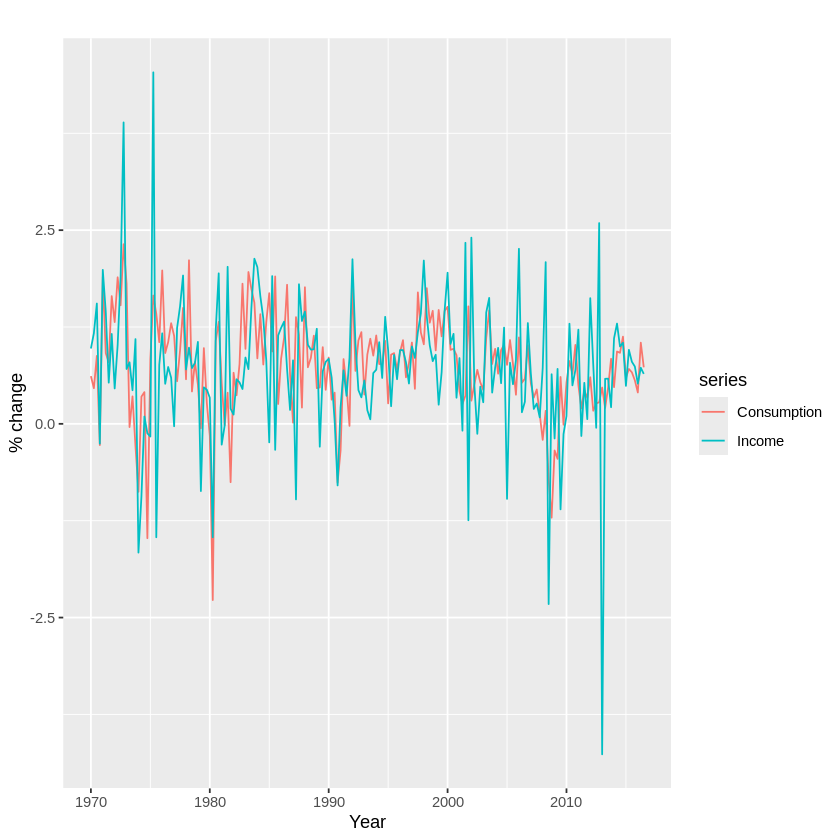

In [6]:
autoplot(uschange[,c("Consumption","Income")]) +
  ylab("% change") + xlab("Year")

`geom_smooth()` using formula = 'y ~ x'


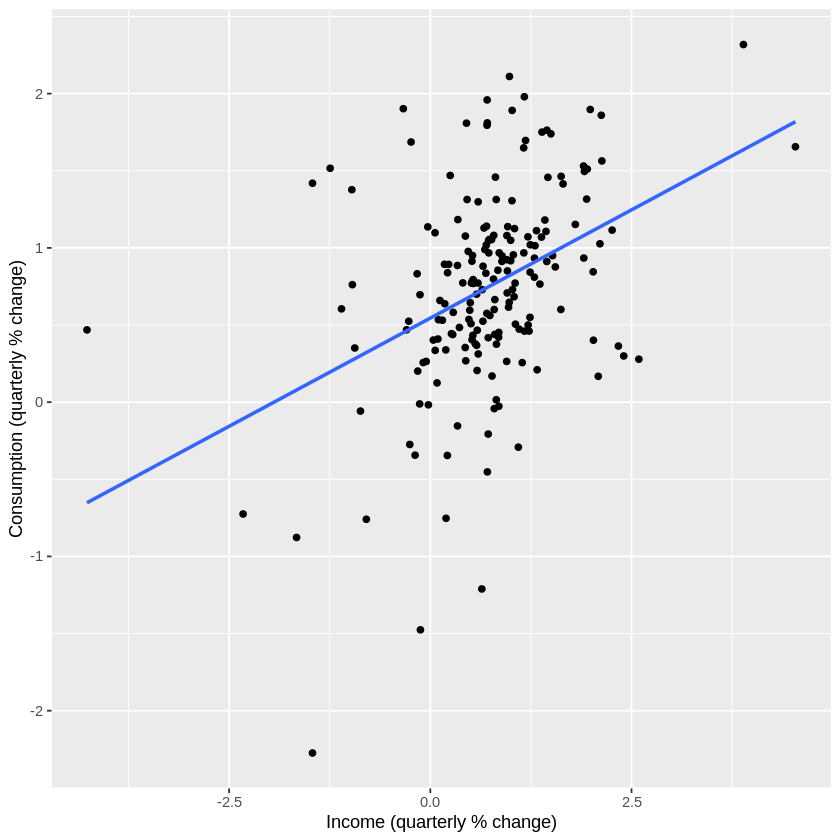

In [7]:
uschange %>%
  as.data.frame() %>%
  ggplot(aes(x=Income, y=Consumption)) +
    ylab("Consumption (quarterly % change)") +
    xlab("Income (quarterly % change)") +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)
#> `geom_smooth()` using formula = 'y ~ x'

In [8]:
tslm(Consumption ~ Income, data=uschange)


Call:
tslm(formula = Consumption ~ Income, data = uschange)

Coefficients:
(Intercept)       Income  
     0.5451       0.2806  


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cards’, ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



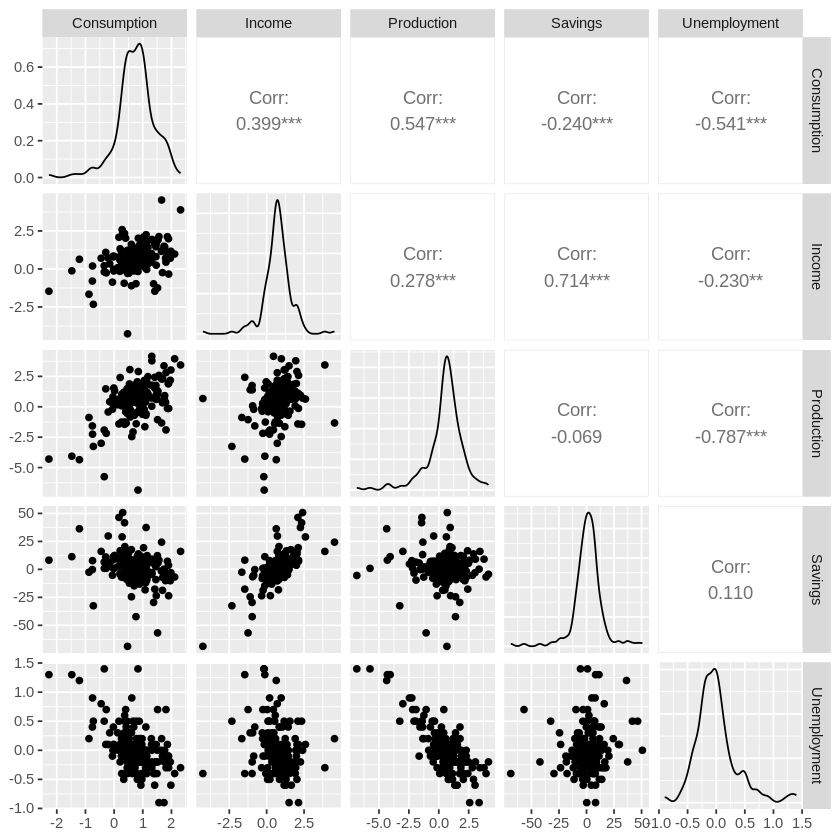

In [9]:
install.packages("GGally")

uschange %>%
  as.data.frame() %>%
  GGally::ggpairs()

In [10]:
fit.consMR <- tslm(
  Consumption ~ Income + Production + Unemployment + Savings,
  data=uschange)
summary(fit.consMR)



Call:
tslm(formula = Consumption ~ Income + Production + Unemployment + 
    Savings, data = uschange)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88296 -0.17638 -0.03679  0.15251  1.20553 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.26729    0.03721   7.184 1.68e-11 ***
Income        0.71449    0.04219  16.934  < 2e-16 ***
Production    0.04589    0.02588   1.773   0.0778 .  
Unemployment -0.20477    0.10550  -1.941   0.0538 .  
Savings      -0.04527    0.00278 -16.287  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3286 on 182 degrees of freedom
Multiple R-squared:  0.754,	Adjusted R-squared:  0.7486 
F-statistic: 139.5 on 4 and 182 DF,  p-value: < 2.2e-16


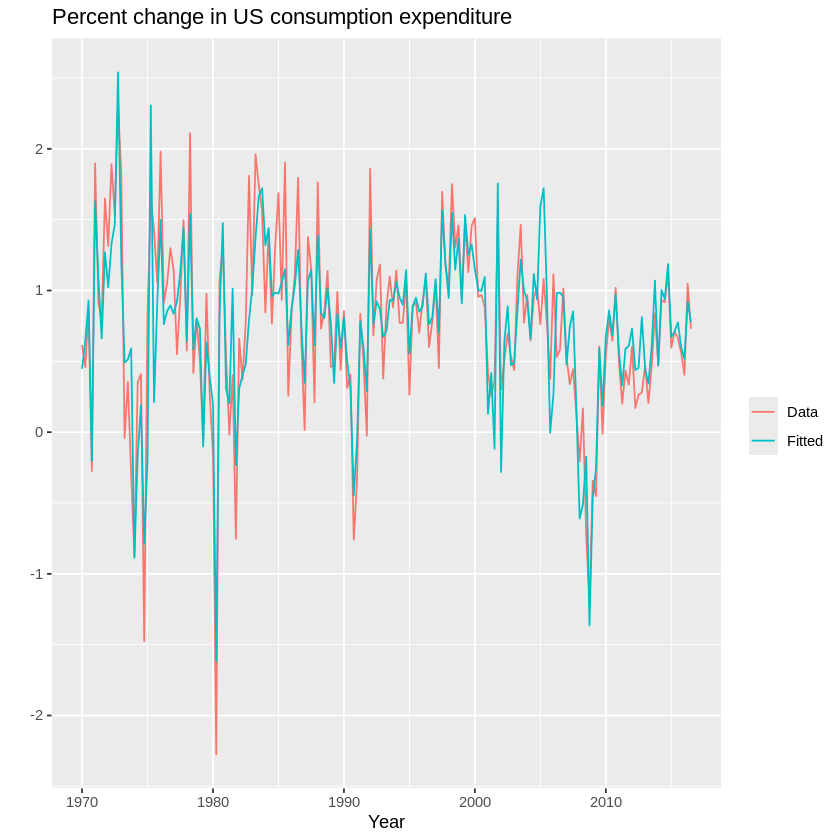

In [11]:
autoplot(uschange[,'Consumption'], series="Data") +
  autolayer(fitted(fit.consMR), series="Fitted") +
  xlab("Year") + ylab("") +
  ggtitle("Percent change in US consumption expenditure") +
  guides(colour=guide_legend(title=" "))

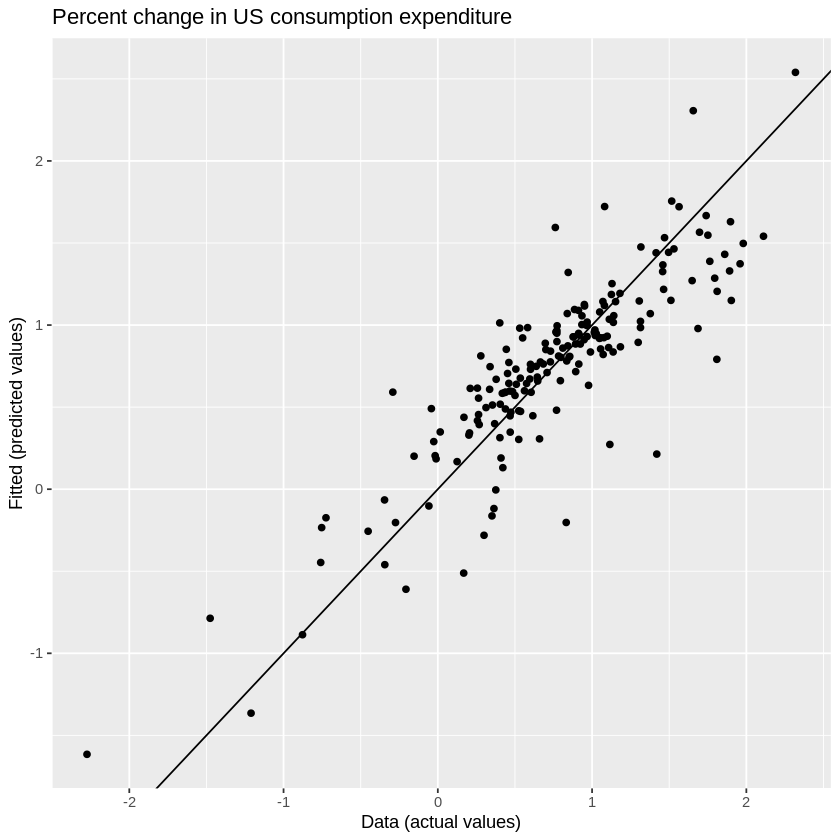

In [14]:
cbind(Data = uschange[,"Consumption"],
      Fitted = fitted(fit.consMR)) %>%
  as.data.frame() %>%
  ggplot(aes(x=Data, y=Fitted)) +
    geom_point() +
    ylab("Fitted (predicted values)") +
    xlab("Data (actual values)") +
    ggtitle("Percent change in US consumption expenditure") +
    geom_abline(intercept=0, slope=1)

In [15]:
cor(uschange[,"Consumption"], fitted(fit.consMR))

[1] 0.8683274

In [16]:
sqrt(0.754)

[1] 0.8683317

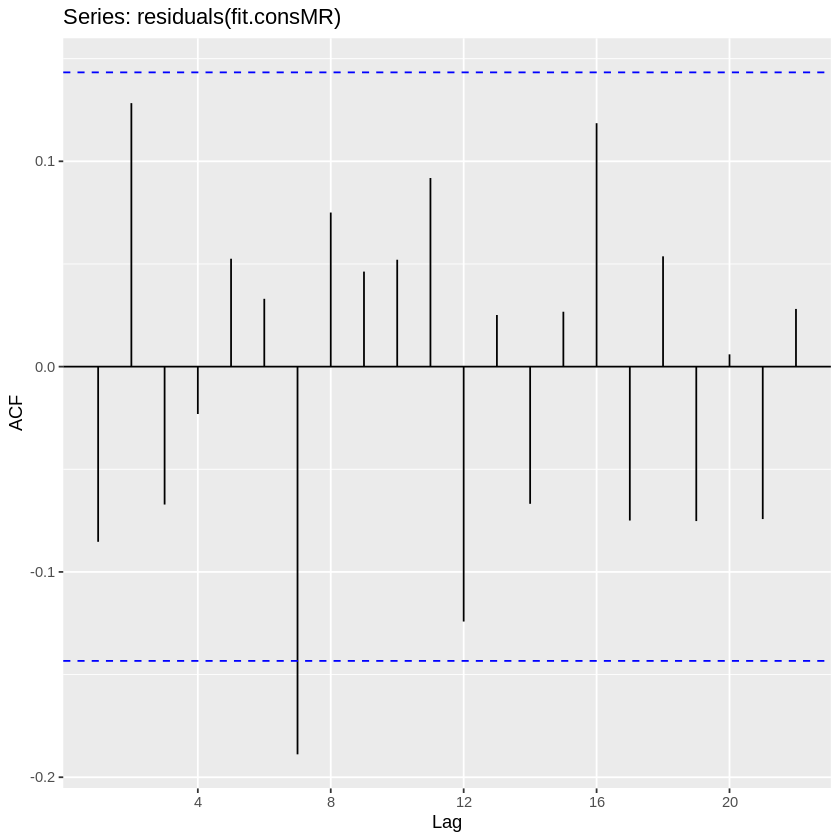

In [18]:
ggAcf(residuals(fit.consMR))

In [19]:
shapiro.test(residuals(fit.consMR))


	Shapiro-Wilk normality test

data:  residuals(fit.consMR)
W = 0.96518, p-value = 0.0001342


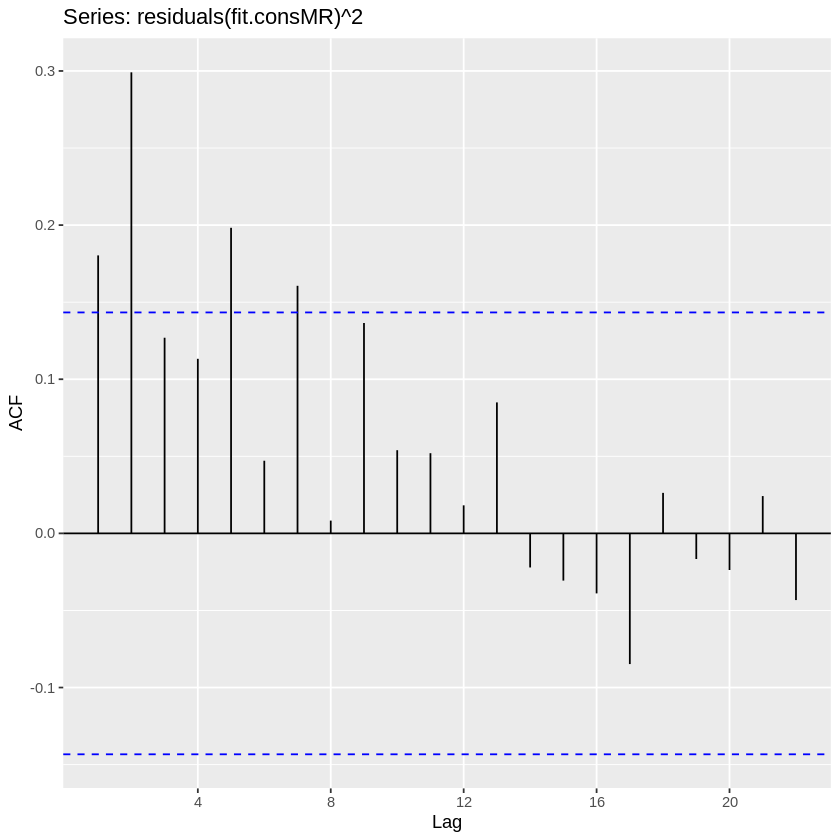

In [20]:
ggAcf(residuals(fit.consMR)^2)


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 14.874, df = 8, p-value = 0.06163


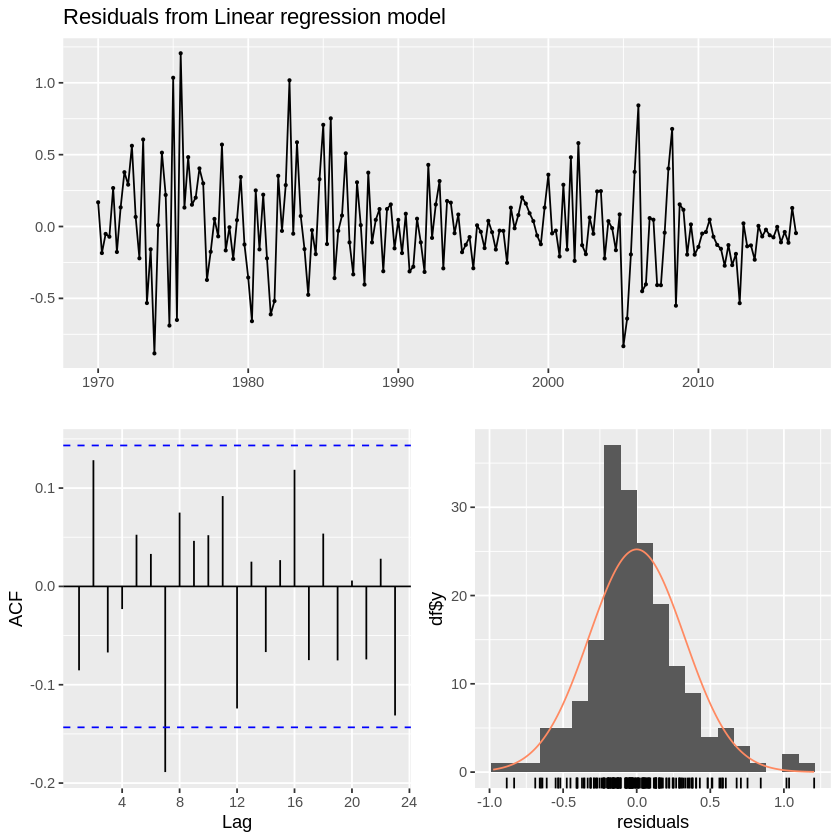

In [22]:
checkresiduals(fit.consMR)

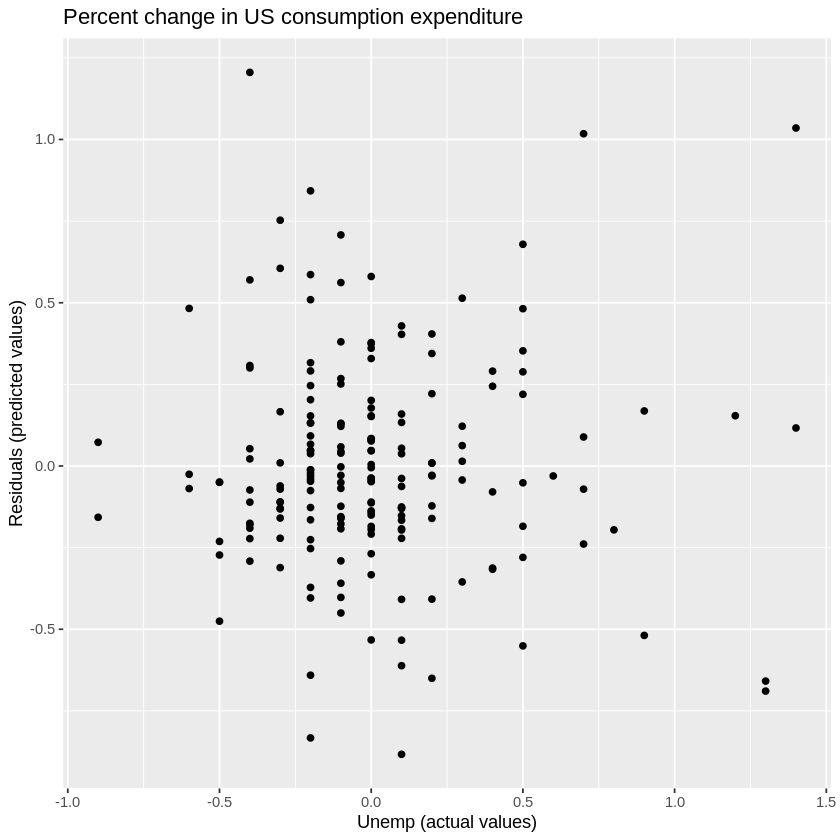

In [27]:
cbind(Data = uschange[,"Unemployment"],
      Residuals = residuals(fit.consMR)) %>%
  as.data.frame() %>%
  ggplot(aes(x=Data, y=Residuals)) +
    geom_point() +
    ylab("Residuals (predicted values)") +
    xlab("Unemp (actual values)") +
    ggtitle("Percent change in US consumption expenditure")

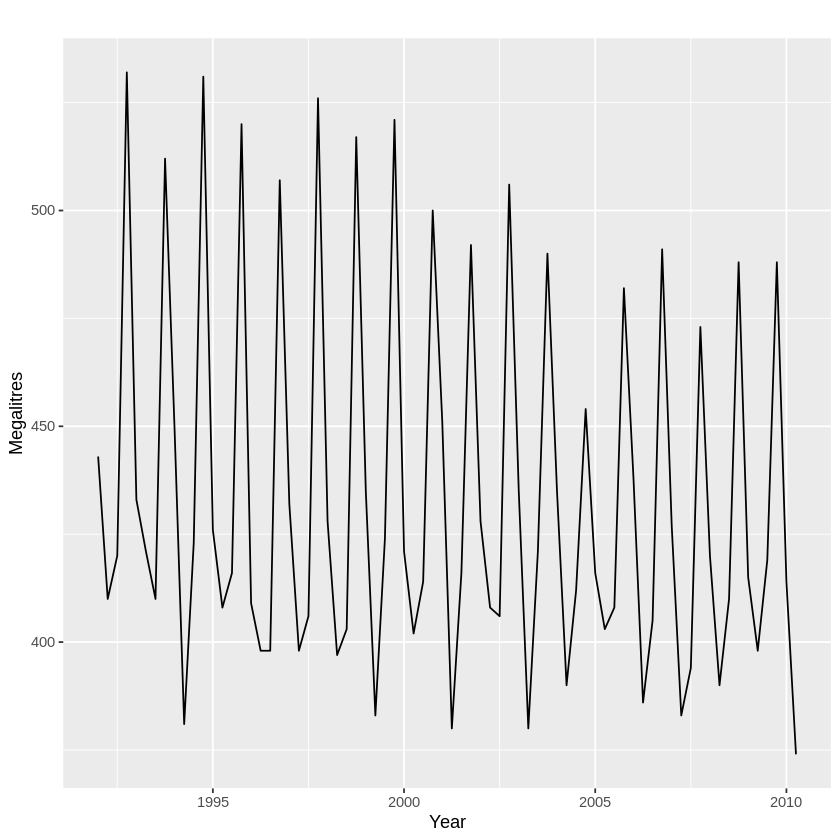

In [28]:
beer2 <- window(ausbeer, start=1992)
autoplot(beer2) + xlab("Year") + ylab("Megalitres")

In [29]:
fit.beer <- tslm(beer2 ~ trend + season)
summary(fit.beer)


Call:
tslm(formula = beer2 ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.903  -7.599  -0.459   7.991  21.789 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 441.80044    3.73353 118.333  < 2e-16 ***
trend        -0.34027    0.06657  -5.111 2.73e-06 ***
season2     -34.65973    3.96832  -8.734 9.10e-13 ***
season3     -17.82164    4.02249  -4.430 3.45e-05 ***
season4      72.79641    4.02305  18.095  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9199 
F-statistic: 210.7 on 4 and 69 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 9.3083, df = 8, p-value = 0.317


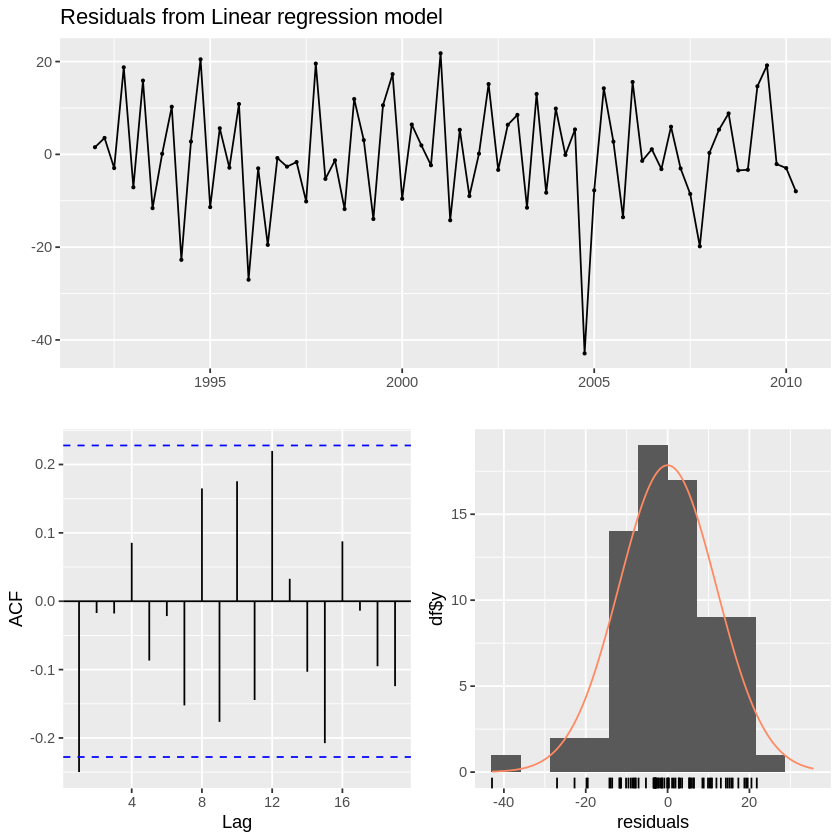

In [30]:
checkresiduals(fit.beer)

In [31]:
fit.beer2 <- tslm(beer2 ~ trend * season)
summary(fit.beer2)


Call:
tslm(formula = beer2 ~ trend * season)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.477  -7.127  -0.504   7.475  21.789 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   437.21096    4.96703  88.023  < 2e-16 ***
trend          -0.21623    0.11551  -1.872  0.06565 .  
season2       -32.06711    7.09532  -4.519 2.64e-05 ***
season3       -22.52873    7.27476  -3.097  0.00287 ** 
season4        94.82825    7.35523  12.893  < 2e-16 ***
trend:season2  -0.07149    0.16336  -0.438  0.66308    
trend:season3   0.12722    0.17041   0.747  0.45800    
trend:season4  -0.58305    0.17041  -3.421  0.00107 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.03 on 66 degrees of freedom
Multiple R-squared:  0.9411,	Adjusted R-squared:  0.9348 
F-statistic: 150.6 on 7 and 66 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals from Linear regression model
LM test = 9.7167, df = 11, p-value = 0.556


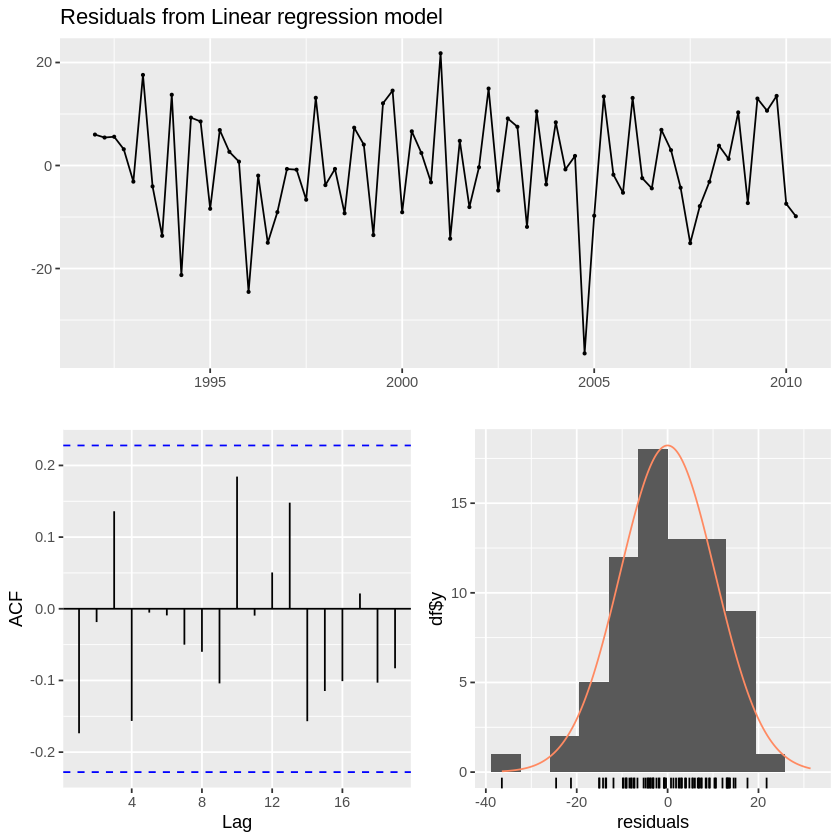

In [32]:
checkresiduals(fit.beer2)

In [33]:
fourier.beer <- tslm(beer2 ~ trend + fourier(beer2, K=2))
summary(fourier.beer)


Call:
tslm(formula = beer2 ~ trend + fourier(beer2, K = 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-42.903  -7.599  -0.459   7.991  21.789 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               446.87920    2.87321 155.533  < 2e-16 ***
trend                      -0.34027    0.06657  -5.111 2.73e-06 ***
fourier(beer2, K = 2)S1-4   8.91082    2.01125   4.430 3.45e-05 ***
fourier(beer2, K = 2)C1-4  53.72807    2.01125  26.714  < 2e-16 ***
fourier(beer2, K = 2)C2-4  13.98958    1.42256   9.834 9.26e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9199 
F-statistic: 210.7 on 4 and 69 DF,  p-value: < 2.2e-16
